In [54]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2sc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
import seaborn as sns #під питанням
import missingno as msno #під питанням
import plotly

DATAFRAME

In [60]:
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df = df.drop(columns = ['prcp'])
df

,time,tavg,tmin,tmax
0,01-01-1990,22.9,19.1,28.4
1,02-01-1990,21.7,NaN,26.5
2,03-01-1990,21.0,16.4,26.5
3,04-01-1990,20.8,NaN,27.4
4,05-01-1990,20.4,14.2,26.1
...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8
11890,22-07-2022,23.2,21.1,27.9
11891,23-07-2022,23.1,20.9,26.7
11892,24-07-2022,22.8,20.0,26.7


Перевірка на аномалії

In [61]:
def filter(df, column):
    temp = df[column]
    filterstemp1 = temp.quantile(0.25)
    filterstemp2 = temp.quantile(0.75)
    odds = filterstemp2 - filterstemp1
    filter_min = filterstemp1 - (1.5 * odds)
    filter_max = filterstemp2 + (1.5 * odds)
    df = df[df[column] >= filter_min]
    df = df[df[column] <= filter_max]
    return df

In [62]:
df = filter(df, 'tavg')
df = filter(df, 'tmin')
df = filter(df, 'tmax')

plt.figure(figsize=(30,5))
df.drop(columns = 'Area (km2)').boxplot()
print()

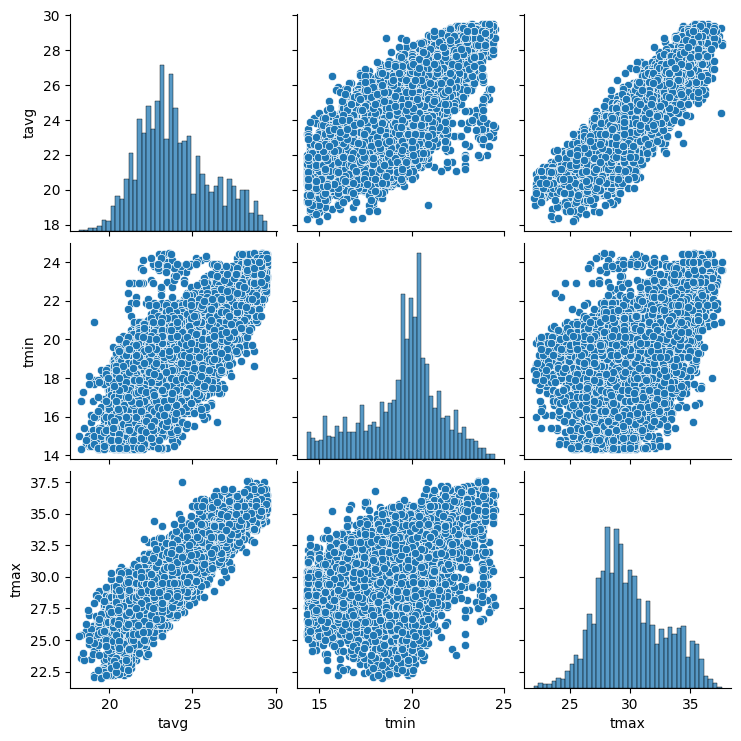

In [63]:
df2 = df.drop(columns = ['time'])
sns.pairplot(df2, kind='scatter')

<AxesSubplot:>

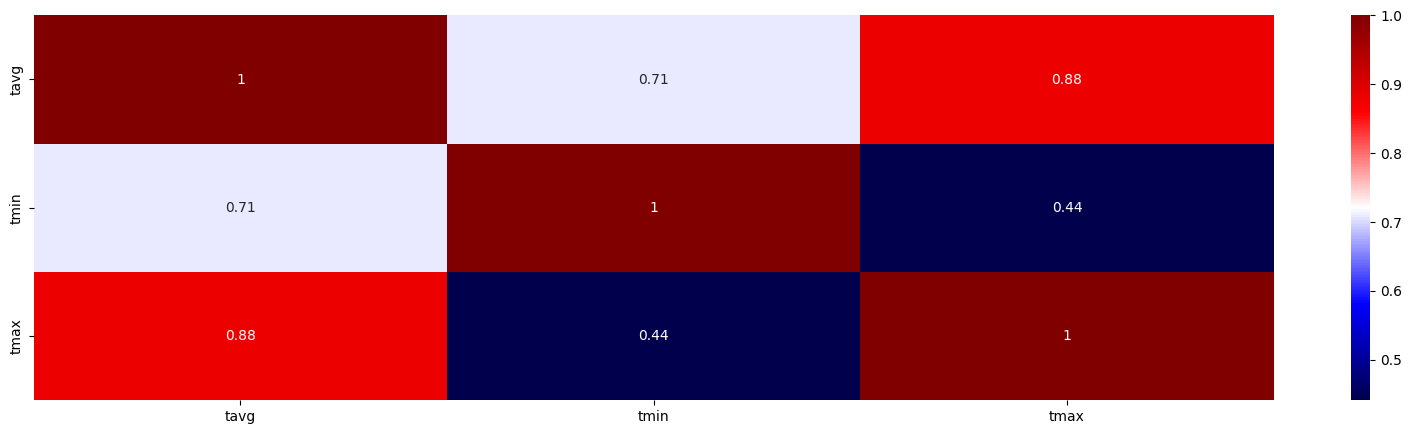

In [64]:
plt.figure(figsize=(20,5))
corr = df2.corr()
sns.heatmap(corr, annot = True, cmap='seismic')

In [65]:
target_column = ['tmin', 'tmax', 'tavg']
predictors = list(set(list(df.columns)) - set(target_column))
X = df[predictors]
Y = df['tavg']
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.5, random_state=1)
print(X_train.shape) 
print(X_test.shape)

(4815, 1)
(4815, 1)


In [66]:
def show(train, prediction):
    print('rmse: ', np.sqrt(mse(Y_train, train)))
    print('r^2: ', r2sc(Y_train, train))
    print('rmse: ', np.sqrt(mse(Y_test, prediction))) 
    print('r^2: ', r2sc(Y_test, prediction))

In [67]:
x_train, x_test, y_train, y_test = tts(df['time'].values, df['tavg'].values, train_size = 0.5)
model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
func= lambda x: model.intercept_ + float(model.coef_)*x
y_pred = model.predict(x_test.reshape(-1, 1))

ValueError: could not convert string to float: '06-03-2018'

LASSO

In [ ]:
lasso = Lasso(alpha=0.01, fit_intercept = True)
lasso.fit(X_train, Y_train)
pred_train_lasso= lasso.predict(X_train)

pred_test_lasso= lasso.predict(X_test)

show(pred_train_lasso, pred_test_lasso)

ValueError: could not convert string to float: 'Europe'